┌ Info: Found initial step size
└   ϵ = 0.2
Sampling: 100%|█████████████████████████████████████████| Time: 0:00:00


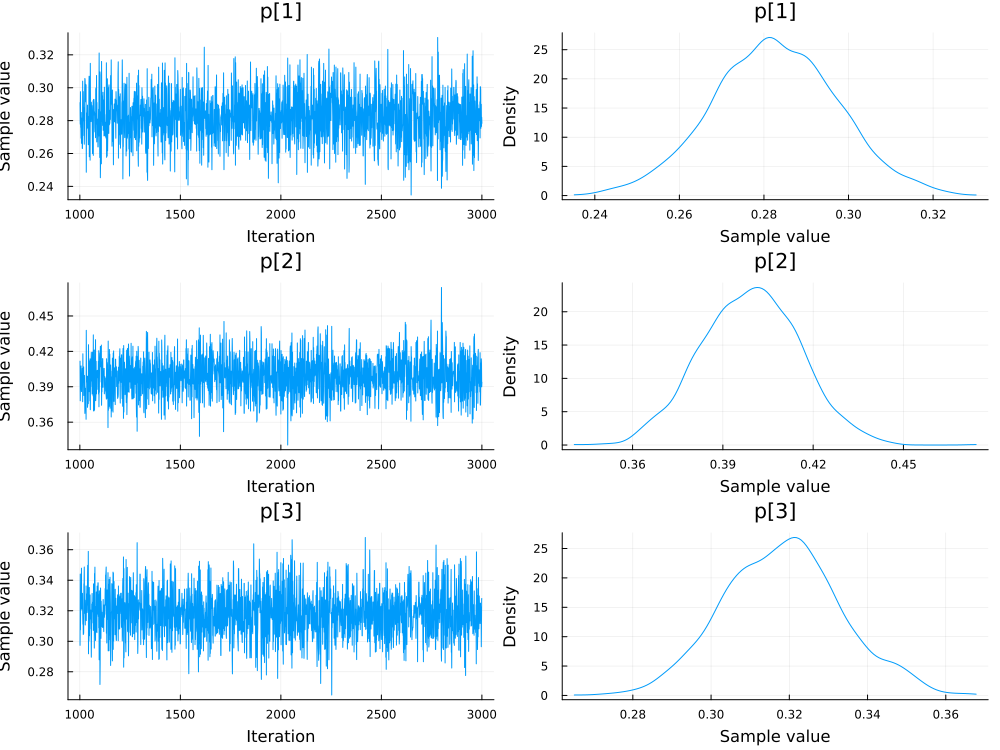

In [5]:
using Turing
using StatsPlots
using Random

# 独自の確率密度関数（例: 三角形分布のような形）
function custom_logpdf(p)
    # 確率パラメータの制約: 0 <= p[i] <= 1, ∑p = 1
    if any(x -> x < 0 || x > 1, p) || abs(sum(p) - 1) > 1e-6
        return -Inf  # 非許容な確率の場合
    end
    # 独自のPDF（例: 特定の重み付けを持つ単純な三角形分布）
    return log(p[1] * 2 + p[2] * 3 + p[3] * 5) - log(10)  # 正規化
end

@model function custom_model(data)
    # パラメータの事前分布をサンプリング
    p ~ Dirichlet(ones(3))  # 初期はDirichletを使用（柔軟な事前分布）

    # 独自の確率密度関数に基づく調整
    Turing.@addlogprob! custom_logpdf(p)  # 手動で確率を加算

    # 観測データの尤度
    data .~ Categorical(p)
end

# サンプルデータの生成
Random.seed!(42)
true_p = [0.3, 0.4, 0.3]
data = rand(Categorical(true_p), 1000)

# モデルを実行
model = custom_model(data)
chain = sample(model, NUTS(), 2000)

# 結果の可視化
plot(chain)
